<a href="https://colab.research.google.com/github/TheOBPGuy/CPP-Projectss/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [174]:
# Get the stock quote
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2019-12-17']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + "AAPL" + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url,header=0)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838933,394024400
...,...,...,...,...,...,...,...
1997,2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755959,90420400
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316818,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485817,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.389565,133587600


In [166]:
df.shape

(2002, 6)

In [175]:
df.set_index(keys='Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838933,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755959,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316818,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485817,137310400


In [176]:
df.set_index('Date',inplace=True)

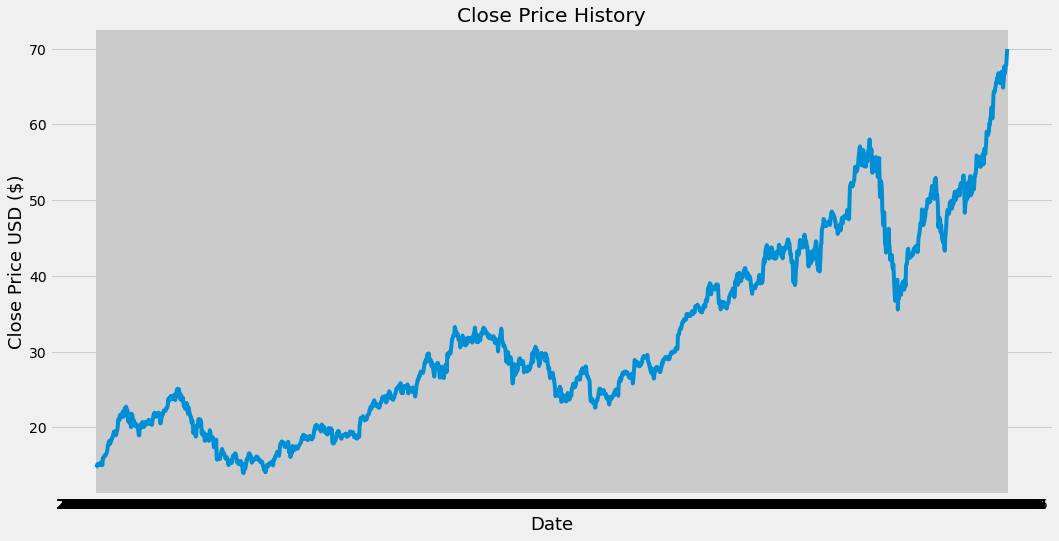

In [177]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [178]:
# Create a new Datafram with only the close column
data = df.filter(['Close'])
# Convert the data frame to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1602

In [179]:
# Scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.01319741],
       [0.0146064 ],
       [0.01753279],
       ...,
       [0.96251175],
       [0.97897982],
       [1.        ]])

In [180]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = [] # independent training features
y_train = [] # Dependent of target variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259])]
[0.13983513293775218]



In [181]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
y_train

array([0.13983513, 0.13326194, 0.14542651, ..., 0.59267196, 0.59070827,
       0.58307678])

In [182]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [183]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [184]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [185]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 48s 29ms/step - loss: 8.0131e-04


1

In [186]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [187]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [188]:
x_test

array([[0.51796321, 0.51448215, 0.52086405, ..., 0.59267196, 0.59070827,
        0.58307678],
       [0.51448215, 0.52086405, 0.53425273, ..., 0.59070827, 0.58307678,
        0.59084215],
       [0.52086405, 0.53425273, 0.54973896, ..., 0.58307678, 0.59084215,
        0.58553137],
       ...,
       [0.74521362, 0.7371358 , 0.72272061, ..., 0.94225031, 0.94921242,
        0.95943234],
       [0.7371358 , 0.72272061, 0.72713889, ..., 0.94921242, 0.95943234,
        0.96251175],
       [0.72272061, 0.72713889, 0.72249745, ..., 0.95943234, 0.96251175,
        0.97897982]])

In [189]:
x_test.shape[1]

60

In [190]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [191]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

13/13 [==============================] - 1s 18ms/step


In [192]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.8407773289410398

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


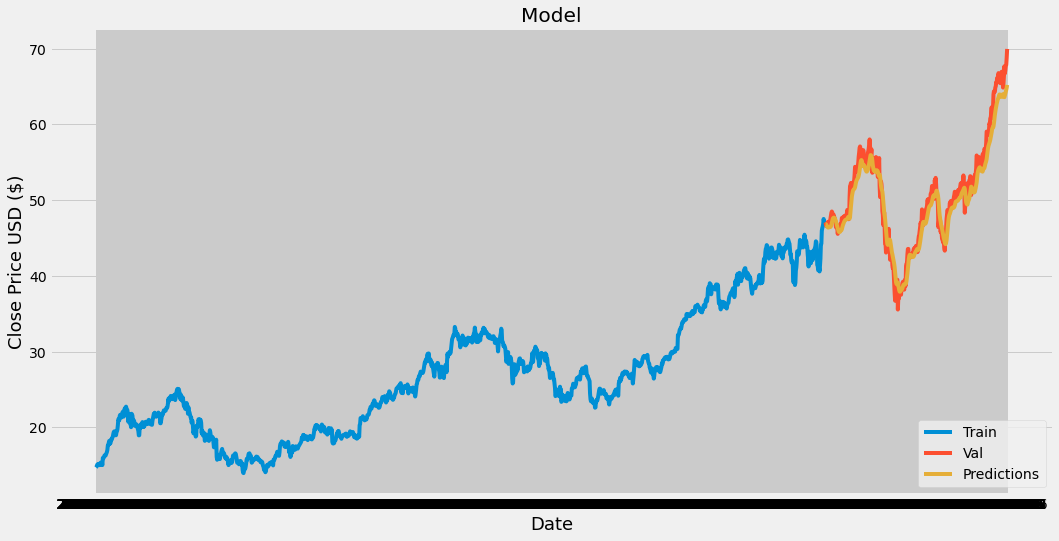

In [193]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'],loc='lower right')
plt.show() # Why did the Data in X Row come out as dark

In [194]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,46.816795
2018-05-17,46.747501,46.814548
2018-05-18,46.577499,46.731262
2018-05-21,46.907501,46.592117
2018-05-22,46.790001,46.488247
...,...,...
2019-12-10,67.120003,64.058388
2019-12-11,67.692497,64.280006
2019-12-12,67.864998,64.557037


In [154]:
data

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786
...,...
1997,67.120003
1998,67.692497
1999,67.864998
2000,68.787498


In [196]:
# Get the quote
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2019-12-17']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + "AAPL" + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
apple_quote = pd.read_csv(url,header=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
# Create a new dataFrame
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
# Create an empty list
X_test = []
# append the past 60 days -> What is the need to do scalar.transform to scale?
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling -> Question: why would we want to undo the scaling?
pred_price = scalar.inverse_transform(pred_price)

1/1 [==============================] - 0s 25ms/step


In [198]:
print(pred_price)

[[65.749435]]


In [211]:
start = pd.to_datetime(['2019-12-18']).astype(int)[0]//10**9 # convert to unix timestamp.
#start
end = pd.to_datetime(['2019-12-19']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + "AAPL" + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
apple_quote2 = pd.read_csv(url,header=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [212]:
print(apple_quote2['Close'])

0    69.934998
Name: Close, dtype: float64
